In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
if "../src" not in sys.path:
    sys.path.append("../src")

from subzero import SubZero
from ipywidgets import interact, IntSlider, FloatSlider

SMALL_SIZE = 25
MEDIUM_SIZE = 40
BIGGER_SIZE = 44

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [4]:


subzero = SubZero("../examples/gews_LK", output=False)

subzero.calculate()
# jetzt stehen Temperaturen in subzero.T und interne Wärmeflüsse in subzero.Q_int
# subzero.T[n]: Temperaturen aller Boxen zum Zeitschritt n
# subzero.T[:, n]: Temperaturzeitreihe von Box n
# subzero.Q_int[:, 0, 1], Wärmeflusszeitreihe, zwischen Box 0 (Speicher) und Box 1 (Speicherumgebung)

# subzero.H: Wärme in Boxen (Matrix, wie Temperatur) 
# subzero.Q_ext: Speicherleistung (Zeitreihe, array)
# subzero.v: Geschwindigkeit im Wärmetauscher (Zeitreihe, array)
# subzero.T_in, T_out: Temperaturen an Wärmetauscher (Zeitreihen, arrays)
# subzero.heat_exchanger_flag (Zeitreihe, array)

# subzero.latent_heat_capacity (Zeitreihe, array) (Multipliziert mit dT/dt * V: Rate [W])

read time series -  10  entries


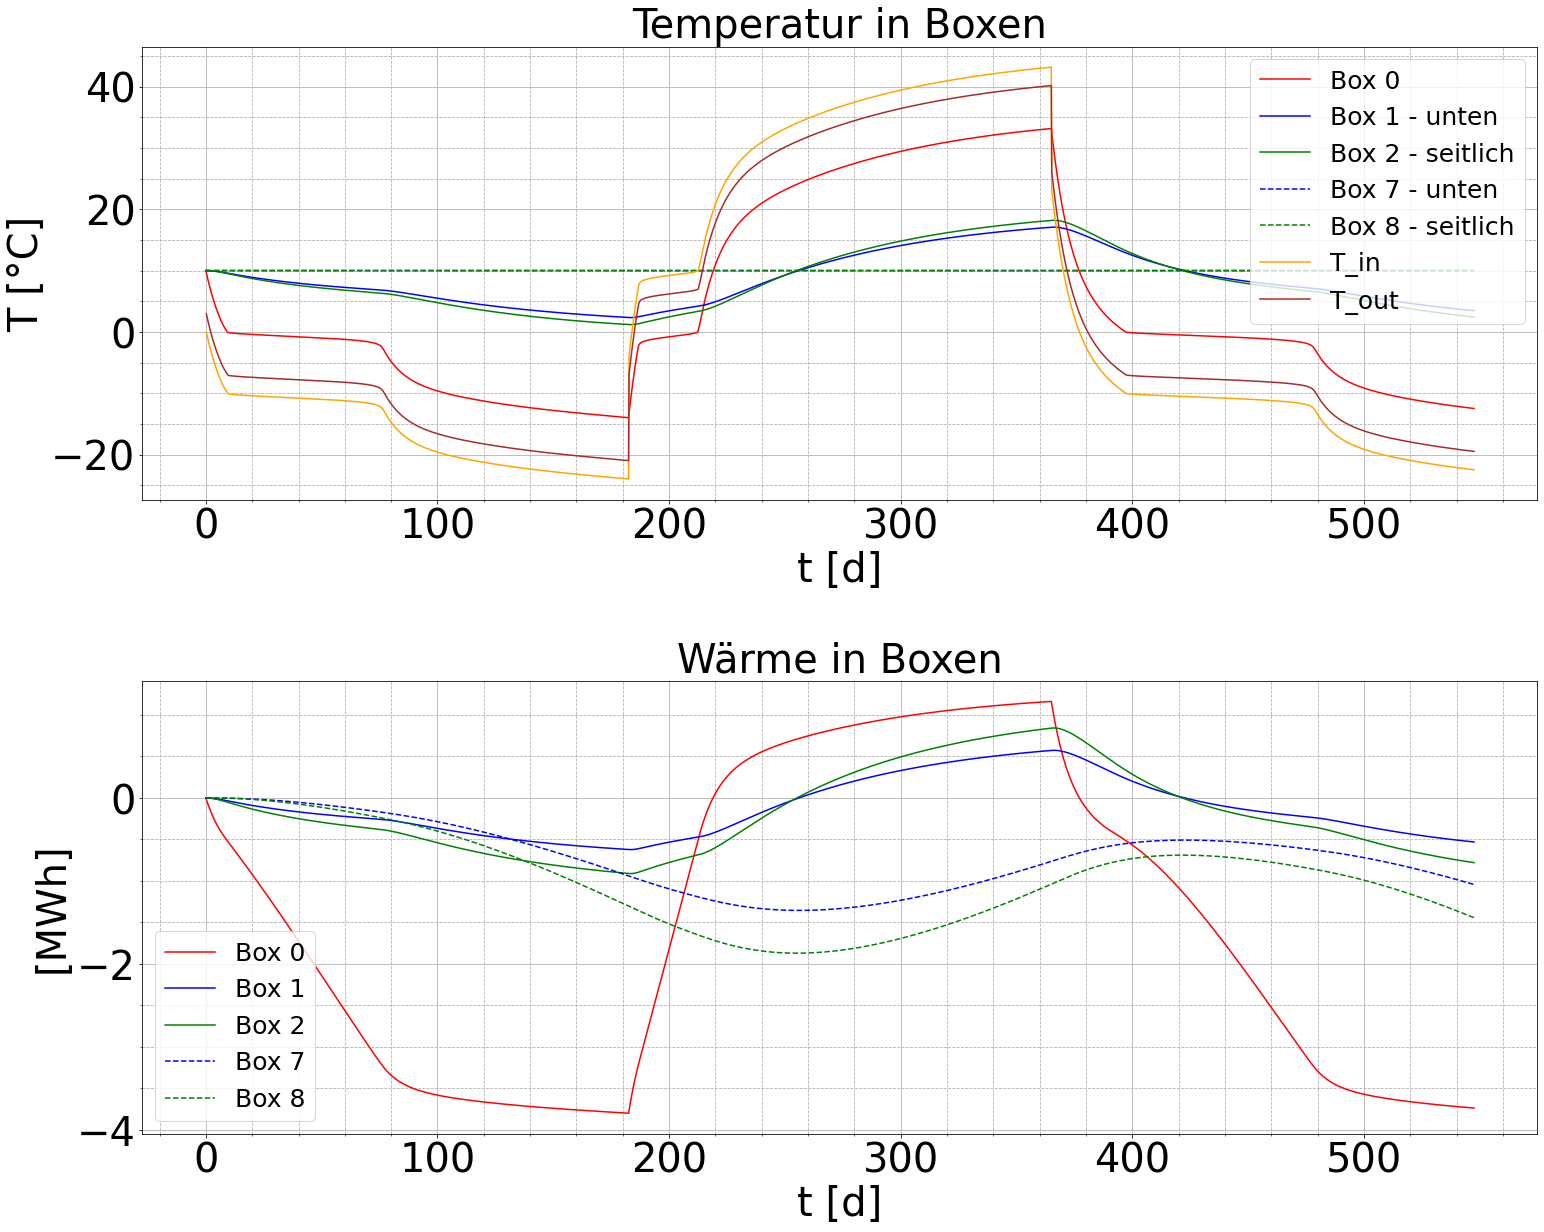

In [3]:
time_array = np.arange(subzero.time.N_t+1) * subzero.time.delta_t
time_factor = 86400
fig, axes = plt.subplots(2, 1, figsize=(25, 20))
plt.subplots_adjust(wspace=.3, hspace=.4)


ax = axes[0]
ax.set_title("Temperatur in Boxen")
ax.plot(time_array/time_factor , subzero.T[:, 0], label='Box 0', color='red')#, marker='x')
ax.plot(time_array/time_factor , subzero.T[:, 1], label='Box 1 - unten', color='blue')
ax.plot(time_array/time_factor , subzero.T[:, 2], label='Box 2 - seitlich', color='green')
ax.plot(time_array/time_factor, subzero.T[:, 7], label='Box 7 - unten', color='blue', linestyle='--')
ax.plot(time_array/time_factor , subzero.T[:, 8], label='Box 8 - seitlich', color='green', linestyle='--')
ax.plot(time_array[1:]/time_factor , subzero.T_in[1:], label='T_in', color='orange')
ax.plot(time_array[1:]/time_factor , subzero.T_out[1:], label='T_out', color='brown')

ax.set_xlabel("t [d]")
ax.set_ylabel("T [°C]")
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-')
ax.grid(visible=True, which='minor', linestyle='--')
ax.legend()#loc='lower right')

#########################
storage_factor = 1e6*3600
ax = axes[1]
ax.set_title("Wärme in Boxen")
ax.plot(time_array/time_factor, subzero.H[:, 0]/storage_factor, label='Box 0', color='red')
ax.plot(time_array/time_factor, subzero.H[:, 1]/storage_factor, label='Box 1', color='blue')
ax.plot(time_array/time_factor, subzero.H[:, 2]/storage_factor, label='Box 2', color='green')
ax.plot(time_array/time_factor, subzero.H[:, 7]/storage_factor, label='Box 7', color='blue', linestyle='--')
ax.plot(time_array/time_factor, subzero.H[:, 8]/storage_factor, label='Box 8', color='green', linestyle='--')

ax.set_xlabel("t [d]")
ax.set_ylabel("[MWh]")
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-')
ax.grid(visible=True, which='minor', linestyle='--')
ax.legend()#loc='lower right')


plt.savefig("ergebnisse1.png")

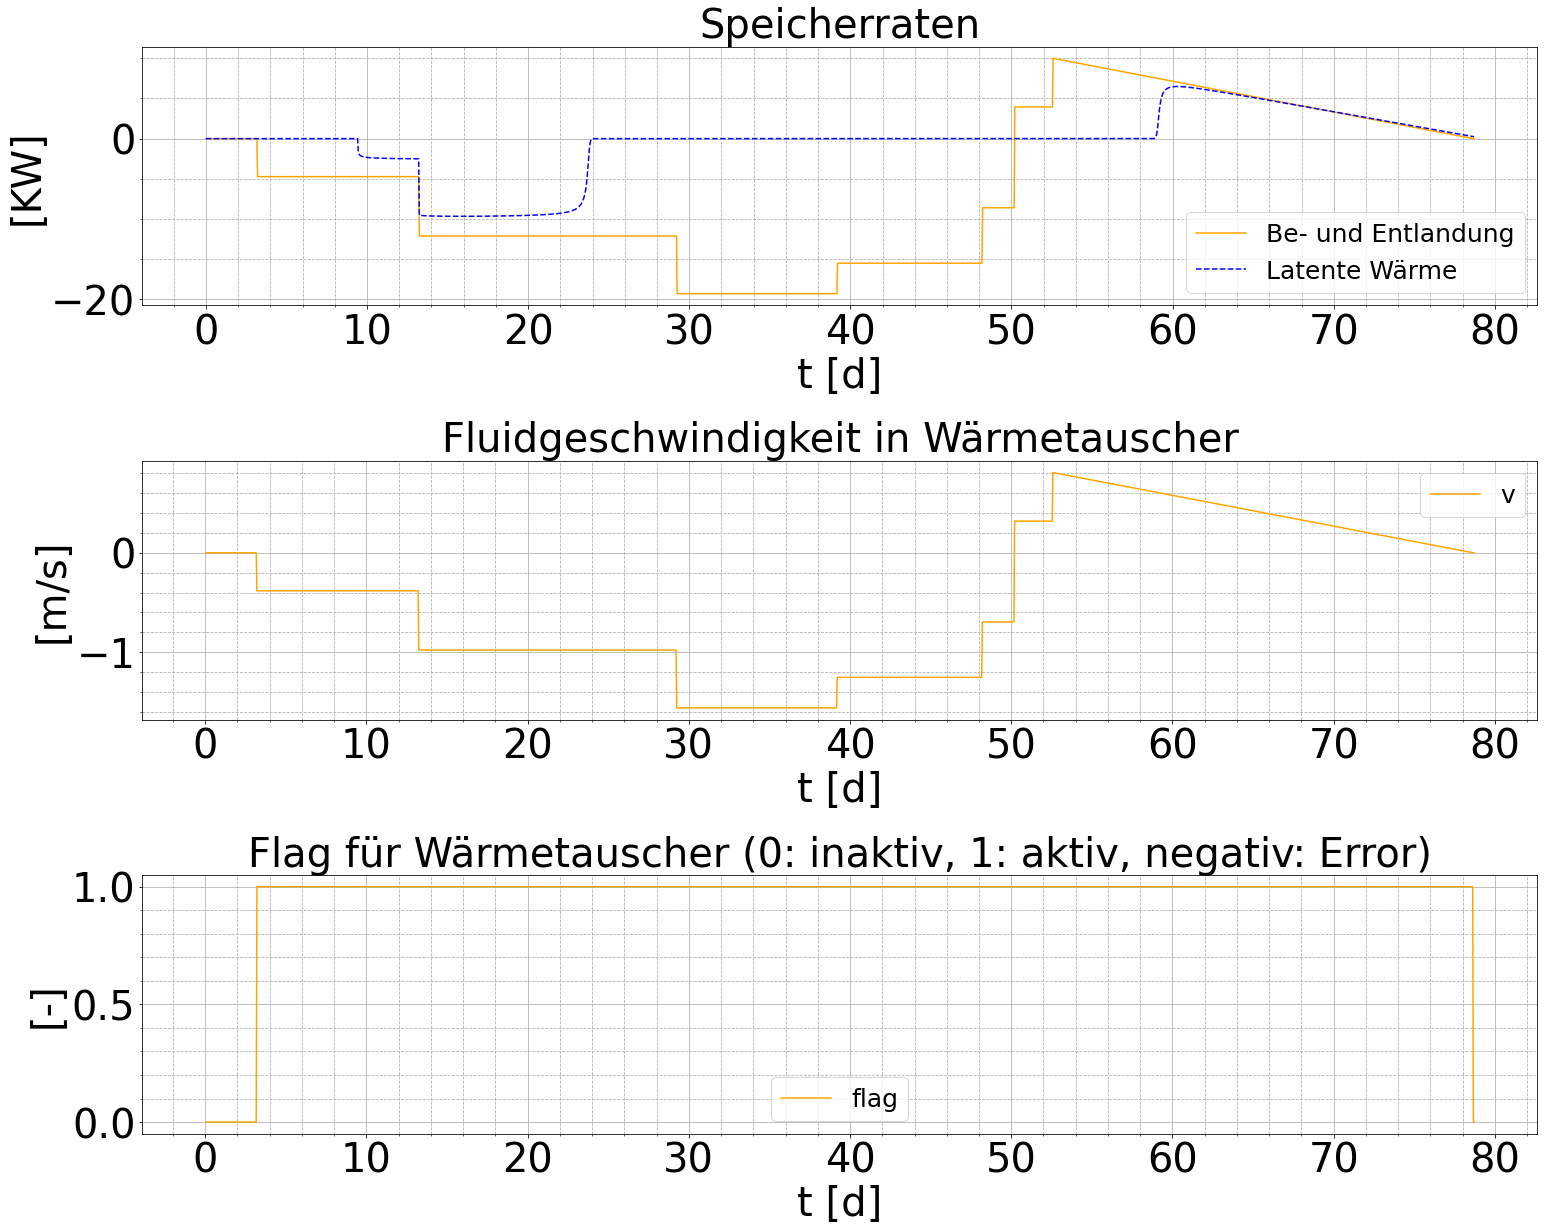

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(25, 20))
plt.subplots_adjust(wspace=.3, hspace=.6)

#########################
storage_factor = 1e3
V_box0 = 4*4*6 # m3
ax = axes[0]
ax.set_title("Speicherraten")
ax.plot(time_array/time_factor, subzero.Q_ext/storage_factor, 
        label='Be- und Entlandung', color='orange')
ax.plot(time_array/time_factor, 
        -subzero.latent_heat_capacity*V_box0*
        (subzero.T[:, 0]-np.roll(subzero.T[:, 0],1))/3600/storage_factor, 
        label='Latente Wärme', color='blue', linestyle='--')

ax.set_xlabel("t [d]")
ax.set_ylabel("[KW]")
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-')
ax.grid(visible=True, which='minor', linestyle='--')
ax.legend()#loc='lower right')

#########################



ax = axes[1]
ax.set_title("Fluidgeschwindigkeit in Wärmetauscher")
ax.plot(time_array[1:]/time_factor, subzero.v[1:], label='v', color='orange')

ax.set_xlabel("t [d]")
ax.set_ylabel("[m/s]")
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-')
ax.grid(visible=True, which='minor', linestyle='--')
ax.legend()#loc='lower right')

#########################

ax = axes[2]
ax.set_title("Flag für Wärmetauscher (0: inaktiv, 1: aktiv, negativ: Error)")
ax.plot(time_array[1:]/time_factor, subzero.heat_exchanger_flag[1:], label='flag', color='orange')

ax.set_xlabel("t [d]")
ax.set_ylabel("[-]")
ax.minorticks_on()
ax.grid(visible=True, which='major', linestyle='-')
ax.grid(visible=True, which='minor', linestyle='--')
ax.legend()#loc='lower right')

plt.savefig("ergebnisse2.png")